## <center>Assignment 3 - World Bank Data Analysis</center>

In [10]:
"""Importing all neceassary libraries"""
import wbgapi as wb
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from scipy import spatial
import itertools as iter


def load_clean_data():
    """ Loading and clearning the data """
    
    dataframe = pd.read_csv("WDIData.csv")
    del dataframe["Unnamed: 66"]
    dataframe = dataframe.fillna(0)
    
    return dataframe

def visualize_emu_gpd():
    """ EMU countries gdp visualization """
    
    gdppercap = wb.data.DataFrame('NY.GDP.PCAP.CD', wb.region.members('EMU'))
    g5 = gdppercap.sort_values(by=['YR2020'], ascending = False)[:5]
    ax = gdppercap.T.plot(color = 'lightgray', legend=False)
    g5.T.plot(ax=ax, figsize=(15,5))

def get_visualization(df):
    """This Function will visualized data according to the GDP growth"""
    
    df = df.head(7000)
    df = df.fillna(0)
    
    palette = sns.color_palette("Paired", 10)
    sns.set_palette(palette)
    
    #we take only data, not additional informations
    df = df[0:-5]
    df.replace('..', np.nan, inplace=True)
        
    col_list = df.columns[4:].values
    df[col_list]=df[col_list].apply(pd.to_numeric)
    #reindex all table, create pivot view
    pv2 = pd.pivot_table(df,index=['Indicator Name','Country Code'], dropna=False, fill_value=0.0)
    # set the years
    pv2.columns = np.arange(1960,2022)
    palette = sns.color_palette("Paired", 10)
    sns.set_palette(palette)

    pv2.loc['GDP (current US$)'].T.plot(alpha=1, rot=45)
    pv2.loc['GDP per capita (current US$)'].T.plot(alpha=0.8, rot=45)
    pv2.loc['GDP per capita (current US$)'].T.plot(alpha=0.75, rot=45)
    pv2.loc['GDP growth (annual %)'].T.plot(alpha=0.75, rot=45)


def gdp_clustering(dataframe):
    """ GDP clustering using K-Means """
    
    years = dataframe.columns[4:].tolist()
    new_data = dataframe.copy()
    new_data = new_data[:10000]
    year_values = []
    for index, row in new_data.iterrows():
        one_row_gdp = []
        if "GDP" in row["Indicator Name"]:
            if row.any():
                for year in years:
                    one_row_gdp.append(row[year])
                one_row_gdp.append(1)
                year_values.append(np.array(one_row_gdp))

    year_values = np.array(year_values)

    kmeans = KMeans(n_clusters=2, random_state=0)
    clusters = kmeans.fit_predict(year_values)
    kmeans.cluster_centers_.shape
    return clusters[:1000]


def co2_clustering(dataframe):
    """ CO2 clustering using K-Means """
    
    years = dataframe.columns[4:].tolist()
    new_data = dataframe.copy()
    new_data = new_data[:10000]
    year_values = []
    for index, row in new_data.iterrows():
        one_row_gdp = []
        if "CO2" in row["Indicator Name"]:
            if row.any():
                for year in years:
                    one_row_gdp.append(row[year])
                    one_row_gdp.append(1)
            year_values.append(np.array(one_row_gdp))

    year_values = np.array(year_values)

    kmeans = KMeans(n_clusters=2, random_state=0)
    clusters = kmeans.fit_predict(year_values)
    kmeans.cluster_centers_.shape
    
    return clusters[:1000]


def normalize_values(col):
    """ Min Max normalization """
    
    max_value = col.max()
    min_value = col.min()
    new_col = (col - min_value) / (max_value - min_value)
    return new_col


def prediction(dataframe, years):
    """ Linear Regression grouped by years """
    
    X = np.array([normalize_values(dataframe[year]) for year in years])
    y = years

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    model = linear_model.LinearRegression()
    model = model.fit(X_train, y_train)
    predicted_data = model.predict(X_test)
    predicted_data = np.round_(predicted_data)

    MSE = mean_squared_error(y_test,predicted_data)
    PD = predicted_data
    return MSE


def country_clustering(dataframe):
    """ Country Grouping and Feature Vectors """
    
    years = dataframe.columns[4:].tolist()
    new_data = dataframe.copy()
    new_data = new_data[-20000:]
    countries = {}

    for index, row in new_data.iterrows():
        one_row_country = []
        if row.any():
            for year in years:
                one_row_country.append(row[year])

        if row['Country Name'] in countries:
            countries[row['Country Name']].extend(one_row_country)
        else:
            countries[row['Country Name']] = [one_row_country]

    return countries


def cosine(country1, country2):
    """ Cosine Similarity Function """
    
    result = 1 - spatial.distance.cosine(country1, country2)
    
    return result

def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper   


GDP Clusters: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 

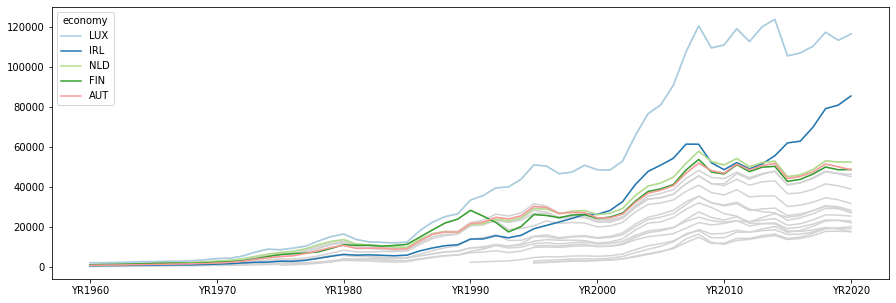

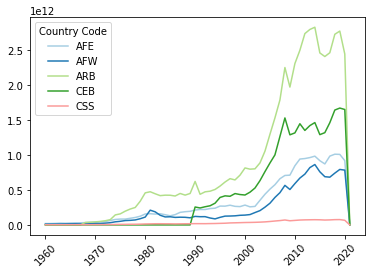

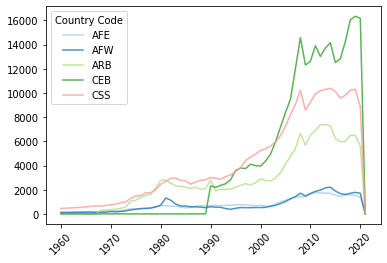

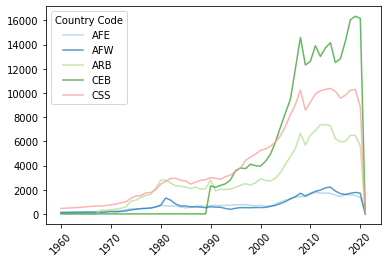

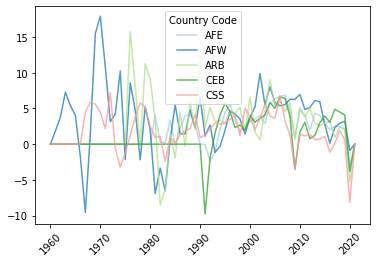

In [11]:
if __name__ == "__main__":
    dataframe = load_clean_data()
    gdp_df = gdp_clustering(dataframe)
    print(f"GDP Clusters: {gdp_df}")
    print("\n")
    co2_df = co2_clustering(dataframe)
    print(f"CO2 Clusters: {co2_df}")
    print("\n")
    years = dataframe.columns[4:]
    error = prediction(dataframe, years)
    print(f"Prediction Error: {error}")
    print("\n")

    countries = country_clustering(dataframe)
    ukrain = np.array(countries["Ukraine"][-1000:])
    vietnam = np.array(countries["Vietnam"][-1000:])
    similarity = cosine(ukrain, vietnam)
    print(f"Cosine Similarity of Ukraine and Vietnam: {similarity}")
    print("\n")
    print("Visualizing GDP Growth with 10 years span")
    visualize_emu_gpd()
    print("Visualizing GDP per capita")
    get_visualization(dataframe)

